## 1. Model description

The Van der Pol oscillator is expressed as:

$$
v'' + \mu(v^2 − 1)v' + v = 0
$$

Let $x_1 := v, y_1 := v'$, then

$$
x_1' = y_1 \\
y_1' + \mu(x_1^2 - 1)y_1 + x_1 = 0 \Rightarrow y_1'= \mu(1 - x_1^2)y_1 - x_1
$$

Consider a ring of $N$ copuled Van der Pol oscillators as in references [1], [2]. See also [3] for reachability results in the case of $N=2$ oscillators.

<img src="ringvdp.png" alt="VDP_Ring" style="width: 500px;"/>.

If $v_1, v_2, \ldots, v_N$, $v_{N+1} \equiv v_1$ and $v_0 \equiv v_N$, denote the state variables for each oscillator, their coupled dynamics is:

$$
v_i'' + \mu(v_i^2 − 1)v_i' + v_i = b_i (v_{i-1} - 2v_i + v_{i+1}) ,\qquad i = 1,\ldots, N
$$

Here $b_i$ is the coupling parameter corresponding to the $i$-th oscillator.

Let's introduce variables $x_i := v_i$ and $y_i := v_i'$ for $i = 1,\ldots, N$. Then, the equation for the $i$-th oscillator is

$$
y_i' + \mu(x_i^2 - 1)y_i + x_i = b_i (x_{i-1} - 2x_i + x_{i+1}) ,\qquad i = 1,\ldots, N
$$

Regarding the choice of coupling parameters $b_i$:

- We can take $b_i = b$ (the same for all oscillators). It is known that if $b < -0.25$ the oscillations are unstable [2].

- In [1] a sinusoidal distribution of $b_i$ is assumed:
$$
b_i = B_b + A_b \sin \left( \dfrac{2\pi(i-1)}{N-1}\right),\qquad i = 1,\ldots, N.
$$
$B_b$ is a reference value and $A_b$ is the amplitude of the sinusoidal distribution of $b_i$. For $A_b = 1$ and $B_b = 1$, and a value of $\mu = 0.1$, the system is known to be stable [1].

**References and motivation**

The van der Pol (VDP) is considered a classical prototype of a self-excited oscillator. It has been used to model oscillations in a wide variety
of applications such as biological rhythms, heartbeats, chemical
oscillations, electrical circuits and circadian rhythms. The study of
**coupled oscillators** provides information on emergent properties of the coupled system, such as synchronization, clustering,
oscillation death, oscillation modes and stability.

Since this model is parametric in $N$ we can consider different instances of increasing complexity.

[1] Barron, Miguel Angel. [*Stability of a ring of coupled van der Pol oscillators with non-uniform distribution of the coupling parameter.*](http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1665-64232016000100062). Journal of applied research and technology 14.1 (2016): 62-66.

[2] Barron, Miguel A., and Mihir Sen. [*Dynamic behavior of a large ring of coupled self-excited oscillators.*](https://doi.org/10.1115/1.4023008). Journal of Computational and Nonlinear Dynamics 8.3 (2013).

[3] [Coupled Van der Pol oscillator](https://ths.rwth-aachen.de/research/projects/hypro/coupled-van-der-pol-oscillator/). HyPro benchmarks. The Flow* model file is available for download in [this link](http://www-i2.informatik.rwth-aachen.de/i2/fileadmin/user_upload/documents/HybridSystemsGroup/chen/hypro/coupledVanderPol.model).

## 1.2 Case $N = 2$

$$
x_1' = y_1 \\
y_1'= \mu(1 - x_1^2)y_1 - x_1 + b_1(x_2 - 2x_1 + x_2) \\
x_2' = y_2 \\
y_2'= \mu(1 - x_2^2)y_2 - x_2 + b_2(x_1 - 2x_2 + x_1)
$$

If we take $b_1 = b_2 = 1/2$, then we have the same equations as in [3]:

$$
x_1' = y_1 \\
y_1'= \mu(1 - x_1^2)y_1 - x_1 + (x_2 - x_1) \\
x_2' = y_2 \\
y_2'= \mu(1 - x_2^2)y_2 - x_2 + (x_1 - x_2)
$$

## 2. Reachability settings

We consider the settings from [3] with $N=2$ oscillators. The initial set is given by $x_1\in [1.25,1.55]$,  $y_1\in [2.25,2.35]$, $x_2\in [1.25,1.55]$ and $y_2\in [2.25,2.35]$.

## 3. Results

In [35]:
using Revise, ReachabilityAnalysis, BenchmarkTools, Plots

In [18]:
using ReachabilityAnalysis, Plots, LaTeXStrings

In [3]:
@taylorize function vdp_N2!(dx, x, params, t)
    local μ = 1.0
    x₁, y₁, x₂, y₂ = x
    dx[1] = y₁
    dx[2] = μ * (1 - x₁^2) * y₁ - x₁ + (x₂ - x₁)
    dx[3] = y₂
    dx[4] = μ * (1 - x₂^2) * y₂ - x₂ + (x₁ - x₂)
    return dx
end

In [30]:
# initial condition
X0 = (1.25..1.55) × (2.25..2.35) × (1.25..1.55) × (2.25..2.35)

# initial-value problem
prob = @ivp(x' = vdp_N2!(x), dim=4, x(0) ∈ X0)

# time horizon
T = 14.0

# compute a Taylor model flowpipe
sol = solve(prob, T=T, alg=TMJets(abs_tol=1e-10, orderT=10, orderQ=2))

# overapproximate the solution with zonotopes
solz = overapproximate(sol, Zonotope);

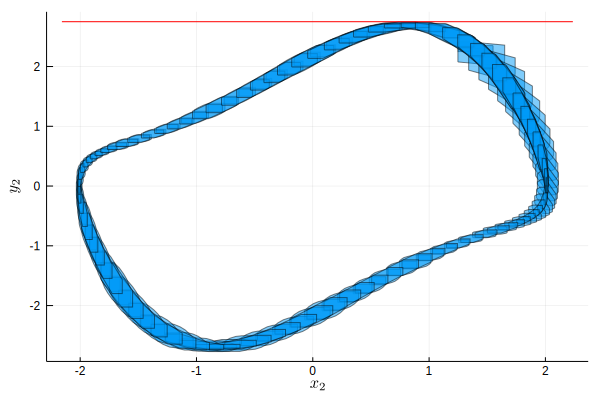

In [31]:
# plot the solution and a reference value
plot(solz, vars=(3, 4))
plot!(x -> 2.75, color=:red, lab="",xlab=L"x_2", ylab=L"y_2")

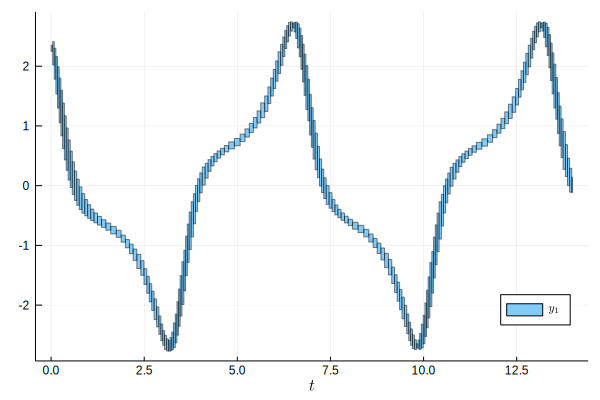

In [34]:
plot(solz, vars=(0, 2), lab=L"y_1", xlab=L"t", legend=:bottomright)

## 4. Open questions

- How do the tools behave for values of $N$ larger than 2?

    - For example, in [1] the authors use $N=101$: *It is assumed that N= 101, which is a sufficiently large amount of oscillators for analysis. Any increase in the amount of oscillators does not change the global behavior of the ring.*
    - That value seems prohibitively large for reachability computations. However, can we handle 10 or 20 oscillators?

- What is a good measure of the approximation? In the case of $N=1$ oscillator, we were given a property that should be verified. Can we formulate a similar property for the ring of $N$ oscillators?

    - For example, in [1] the authors observe that the oscillator position for some "observed" oscillators stabilizes after some initial variations in the amplitude. The initial conditions that they take are
$x_1(0) = 1, y_1(0) = 0$, and $x_i = y_i= 0$ for $ i = 2, \ldots, N$.

<img src="vdposc.png" alt="vdposc" style="width: 500px;"/>.